# Cleaning and plot tips

(I don't really have a useful name for this Notebook.)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api

saf = pd.read_csv("data/Safiya_extract_3-1-2023.csv")
theo = pd.read_csv("data/Theo_Extract_2-21-2023.csv")


# Filtering features

Data sets should be reduced to the features you're actively using to save RAM as well as computational time. Filter your data as early as possible.

In [30]:
theo = theo[
    [
        "adults",
        "age",
        "attend",
        "babies",
        "born",
        "childs",
        "citizen",
        "degree",
        "divorce",
        "ethclose",
        "ethnic",
        "famgen",
        "hapmar",
        "happy",
        "health",
        "income",
        "livecom1",
        "localgvt",
        "manners",
        "marital",
        "martype",
        "misswork",
        "natmeet",
        "overwork",
        "ownbiz",
        "parborn",
        "postlife",
        "race",
        "region",
        "rincome",
        "sex",
        "teens",
        "uscitzn",
        "widowed",
        "workhard",
        "wrkstat",
        "year",
    ]
]


## Recoding variables

[pandas.Series.map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) maps values in a `Series` to a new set of values. You can pass a `dict` that maps `old_value: new_value` or a function/lambda that returns the correct value. Here is an example using a function.

In [5]:
def recode_educ(educ):
    """Reduce GSS's `educ` variable to a few categories.

    Parameters
    ----------
    educ : int
        Sentinel value GSS' `educ` variable.

    Returns
    -------
    str
        String representing the input's collapsed category.
    """
    if educ == 0:
        # This can be collapsed into "Less than high school too"
        return "No schooling"
    elif educ < 13:
        return "Less than high school"
    elif educ < 17:
        return "College"
    elif educ < 19:
        return "Master's"
    elif educ >= 19 and educ < 97:
        return "Ph. D/Doctorate"
    else:
        return np.nan


# Map the function over all of `educ`
saf["educ_cat"] = saf["educ"].map(recode_educ)


Here is an example using a `dict`.

In [24]:
# Map 1 to "Africa" and 17 to "Mexico"
theo["ethnic"] = theo["ethnic"].map({1: "Africa", 17: "Mexico"})

# Everything that wasn't 1 or 17 is now null.
# drop those nulls based on ethnicy's nullity
theo.dropna(how="any", subset=["ethnic"])

# And let's look at the results
theo["ethnic"].value_counts()


Africa    1072
Mexico     946
Name: ethnic, dtype: int64

## Frequency table

[pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) calculates a frequency table.

The table is a `Series` which you may customize as you wish.

In [6]:
# Calculate a frequency table and return that as a DataFrame
education_tab = saf.educ_cat.value_counts().to_frame()
# Calculate percents
education_tab = education_tab.assign(perc=education_tab / education_tab.sum() * 100)
# Cumulative sum
education_tab = education_tab.assign(perc_cumulative=education_tab.perc.cumsum())
# Sort table by percent
education_tab = education_tab.sort_values(by="perc", ascending=False)

education_tab


,educ_cat,perc,perc_cumulative
College,7029,44.722275,44.722275
Less than high school,6026,38.340650,83.062925
Master's,1643,10.453649,93.516574
Ph. D/Doctorate,988,6.286187,99.802761
No schooling,31,0.197239,100.000000


You can reorganize the table by reindexing using [reindex()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html). For example, let's say you'd like to organize the table so that it follows the order of the ordinal variable.

In [7]:
educ_order = [
    "No schooling",
    "Less than high school",
    "College",
    "Master's",
    "Ph. D/Doctorate",
]
education_tab = education_tab.reindex(educ_order)

education_tab


,educ_cat,perc,perc_cumulative
No schooling,31,0.197239,100.000000
Less than high school,6026,38.340650,83.062925
College,7029,44.722275,44.722275
Master's,1643,10.453649,93.516574
Ph. D/Doctorate,988,6.286187,99.802761


You can also use `pandas`' [Categorical](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) type which supports ordering.

In [8]:
saf["educ_cat"] = pd.Categorical(saf["educ_cat"], categories=educ_order, ordered=True)


# Plots

A quick horizontal bar chart using the recoded `educ`. I prefer ascending or descending to sorting by ordinals, but the plot below is fine too.

* [plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) - Returns a `Figure` and an `Axes` to plot on. This is cleaner than the `pyplot` interface.
* [Axes.barh](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.barh.html) - Draws a horizontal bar plot on the `Axes` obtained by calling `subplots()`.
* [Axes.set_title](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html) - Sets an `Axes` title. Click the link if you'd like to see other parameters you can use to customize the title.

**Note:** I skipped setting axis labels because the title explains the plot.

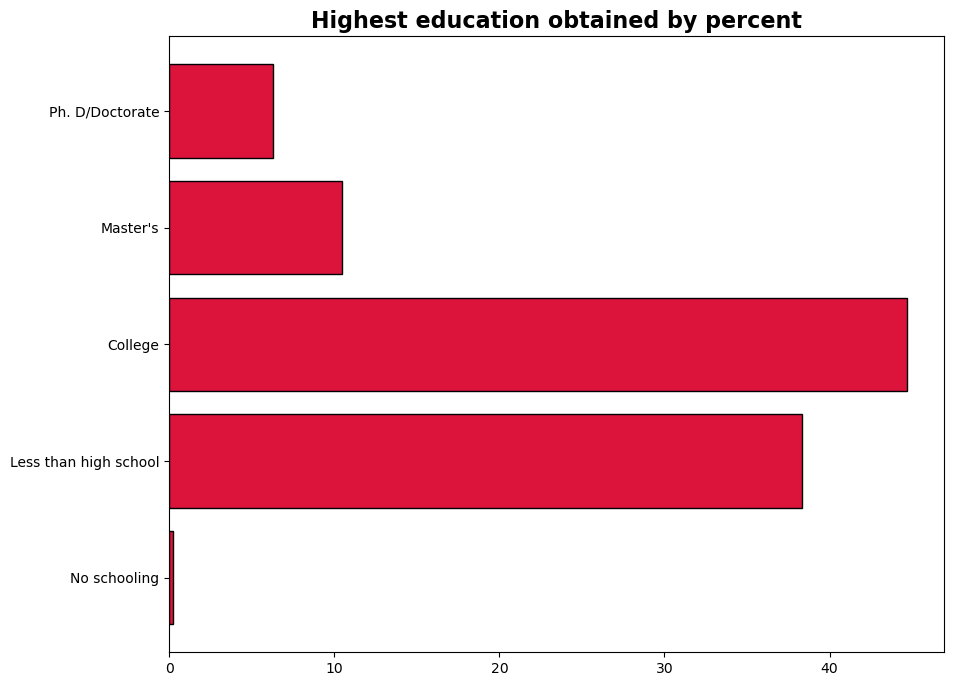

In [9]:
bar_fig, bar_ax = plt.subplots(figsize=(10, 8))
bar_ax.barh(education_tab.index, education_tab.perc, edgecolor="black", color="crimson")

# Axis titles
_ = bar_ax.set_title(
    "Highest education obtained by percent", fontweight="bold", fontsize=16
)


In [10]:
saf


,year,age,educ,degree,sex,race,partyid,othlang,letin1a,coninc,wtssnrps,prez,age_c,decrease_imm,educ_cat
0,2010,31.0,16.0,3.0,1.0,3.0,1.0,1.0,3.0,66239.250,1.083753,1,30.0,0.0,College
1,2010,23.0,16.0,3.0,2.0,1.0,1.0,2.0,2.0,13047.125,0.456877,1,18.0,0.0,College
2,2010,71.0,8.0,0.0,2.0,2.0,0.0,1.0,4.0,17061.625,0.462404,1,70.0,1.0,Less than high school
3,2010,82.0,10.0,0.0,2.0,1.0,6.0,2.0,3.0,7226.100,0.557622,1,80.0,0.0,Less than high school
4,2010,78.0,0.0,0.0,2.0,2.0,3.0,2.0,NaN,NaN,1.286242,1,70.0,NaN,No schooling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15798,2021,21.0,14.0,1.0,2.0,1.0,0.0,1.0,2.0,6048.000,3.585827,2,18.0,0.0,College
15799,2021,29.0,16.0,3.0,2.0,1.0,6.0,2.0,4.0,80640.000,0.833348,2,18.0,1.0,College
15800,2021,NaN,16.0,3.0,2.0,3.0,2.0,1.0,3.0,168736.297,1.042119,2,NaN,0.0,College
15801,2021,68.0,20.0,4.0,2.0,1.0,0.0,1.0,2.0,1344.000,0.637692,2,60.0,0.0,Ph. D/Doctorate
